<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/ML/math/%E1%84%92%E1%85%AA%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF%E1%84%86%E1%85%B5%E1%86%BE%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A84_%E1%84%92%E1%85%AA%E1%86%A8%E1%84%85%E1%85%B2%E1%86%AF%E1%84%86%E1%85%B5%E1%86%BE%E1%84%90%E1%85%A9%E1%86%BC%E1%84%80%E1%85%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 확률 및 통계

## 추측통계 vs 기술통계
- 추측통계 : 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식
- 기술통계 : 전체 데이터의 통계 지표를 계산하는 방식

## 모집단과 표본
- 모집단 : 모체가 되는 집단
    - 추측하고 싶은 관측 대상 전체
    - 모수 : 모집단의 평균, 모분산, 상관계수 등
- 표본 : 통계에서 조사를 위해 데이터를 추출하는 것
    - 표본추출(sampling): 모집단에서 표본을 골라냄
    - 포본 크기(sample size): 골라낸 표본의 수
    - 표본통계량 : 표본을 바탕으로 계산한 표본평균, 표본분산, 상관계수


### 표본추출
조사해야하는 데이터 양이 많을 때, 전 데이터 조사하기에 환경적인 어려움이 따를때


#### 용어 정리
- 추정량(estimator)
    - 표본평균으로 모평균을 추측할 때, 모평의 추정량
- 추정치(estimate)
    - 실제 표본의 데이터 값들을 이용하여 계산한 결과


#### 표본 추출 방법


##### 1. 무작위 추출(Random sampling)
- 추출되는 데이터의 편향을 낮추기 위해 **임의로** 표본을 무작위 추출
- 임의로 표본을 선택해서 추출 후 결과 확인 어렵고 일관성이 없다.



##### 2. 복원 / 비복원 추출
- 복원 추출(Sampling with replacement)
    - 동일한 표본을 중복해서 선택하는 추출 방법
- 비복원 추출(Sampling without replacement)
    - 동일한 표본은 한 번만 선택하는 방법

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
pd.set_option('precision', 3)
np.set_printoptions(precision=3)

In [5]:
from sklearn.datasets import load_boston

boston_houseprice_data = load_boston()
df = pd.DataFrame(
    data = boston_houseprice_data.data, 
    columns = boston_houseprice_data.feature_names
)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006,18.0,2.31,0.0,0.538,6.575,65.2,4.090,1.0,296.0,15.3,396.90,4.98
1,0.027,0.0,7.07,0.0,0.469,6.421,78.9,4.967,2.0,242.0,17.8,396.90,9.14
2,0.027,0.0,7.07,0.0,0.469,7.185,61.1,4.967,2.0,242.0,17.8,392.83,4.03
3,0.032,0.0,2.18,0.0,0.458,6.998,45.8,6.062,3.0,222.0,18.7,394.63,2.94
4,0.069,0.0,2.18,0.0,0.458,7.147,54.2,6.062,3.0,222.0,18.7,396.90,5.33


In [7]:
# random 함수 기본적으로 복원추출
np.random.choice([1,2,3],3)

array([2, 3, 3])

In [ ]:
np.random.choice([1,2,3],3, replace=False)# 비복원 추출

array([2, 1, 3])

In [8]:
np.random.seed(0)
np.random.choice([1,2,3], 3)

array([1, 2, 1])

In [9]:
np.random.seed(0)
sample = np.random.choice(df['AGE'], 20) # 20개의 데이터만 복원추출
sample.mean()

58.785

In [12]:
# 모평균
df['AGE'].mean()

68.575

In [13]:
for i in range(5):
    sample = np.random.choice(df['AGE'], 20)
    print(f'{i+1}번째 무작위추출로 얻은 표본평균 :', sample.mean())

1번째 무작위추출로 얻은 표본평균 : 60.43000000000001
2번째 무작위추출로 얻은 표본평균 : 73.33500000000001
3번째 무작위추출로 얻은 표본평균 : 75.33500000000001
4번째 무작위추출로 얻은 표본평균 : 68.7
5번째 무작위추출로 얻은 표본평균 : 77.20000000000002


## 확률 및 확률 분포

무작위 추출의 불확정성을 수반한 현상을 해석하기 위한 개념

### 확률의 기본
- 확률변수(Random Variable)
    - 결과를 예측할 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
- 기본용어
    - 시행(Trial): 실제 경험을 통해 확률변수의 결과 관측
    - 실현값(Realization) : 시행에 의해 관측되는 값
    - 사건(Event): '눈이 1'혹은 '홀수'와 같이, 시행 결과로 나타날 수 있는 일
    - 근원사건(Elementary Event) : ‘눈이 1’처럼 더이상 세부적으로 분해할 수 없는 사건


'눈이 1'이 되는 사건의 확률
$$
P(X=1) = \frac{1}{6}
$$

- 상호배반(Mutually Exclusive): 각 사건이 동시에 일어날 수 없다는 개념 
    - ex) 눈의 값이 1인 동시에 6일수는 없다.


### 확률분포(Probability Distribution)
- 확률변수가 어떤 값과 확률로 움직이는지를 표현한 것

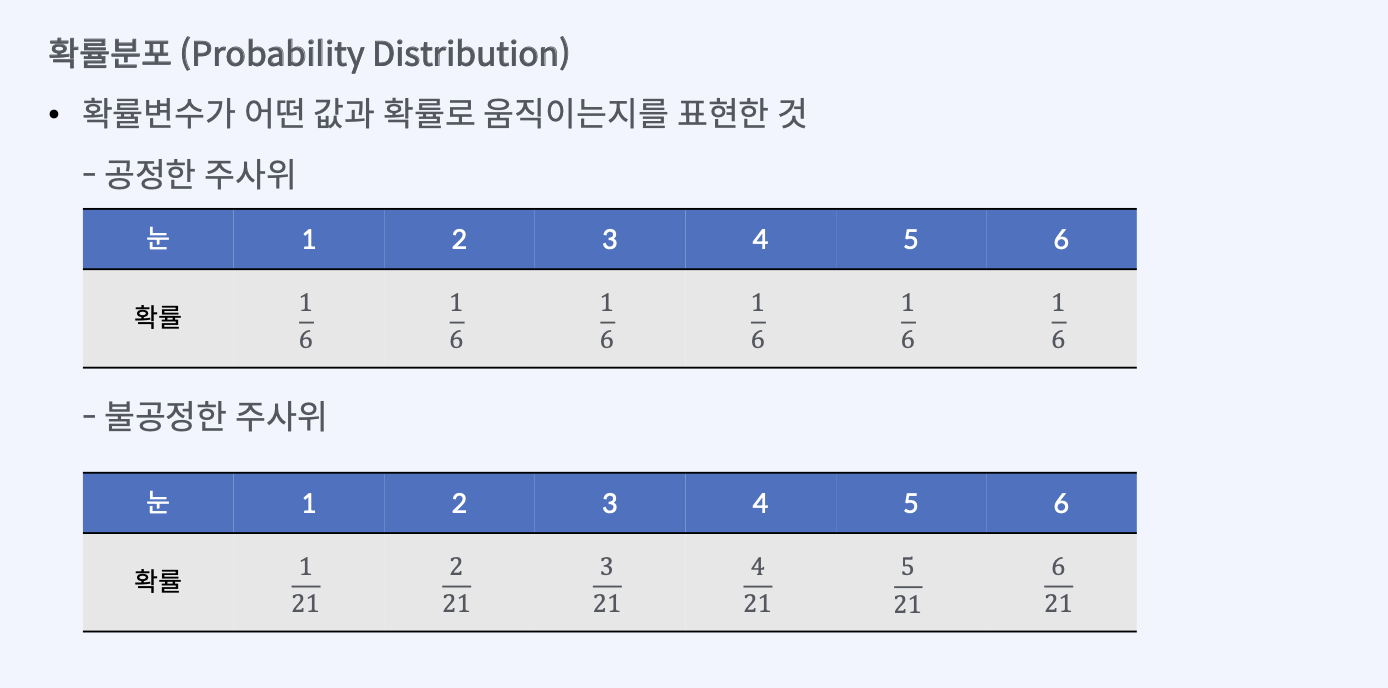

In [14]:
# 불공정한 주사위
dice = [1,2,3,4,5,6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [15]:
np.random.choice(dice, p=prob)

2

In [16]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([5, 2, 3, 4, 6, 2, 6, 2, 6, 4, 6, 5, 6, 1, 3, 2, 4, 2, 4, 4, 2, 5,
       5, 3, 5, 2, 5, 6, 4, 5, 2, 6, 4, 3, 5, 1, 6, 1, 5, 3, 6, 6, 3, 5,
       5, 5, 3, 6, 4, 6, 5, 4, 6, 4, 6, 5, 6, 5, 6, 5, 6, 5, 4, 5, 1, 4,
       5, 4, 5, 4, 2, 4, 5, 5, 5, 5, 5, 4, 6, 4, 4, 6, 6, 5, 2, 6, 5, 6,
       3, 6, 3, 5, 2, 6, 6, 5, 4, 2, 5, 4])

In [18]:
# 도수분포표
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame(
    {
        'frequency':freq,
        'relative frequency':freq/num_trial
    },
    index=pd.Index(np.arange(1,7), name='dice')
)

,frequency,relative frequency
dice,,
1,4,0.04
2,12,0.12
3,9,0.09
4,20,0.20
5,30,0.30
6,25,0.25


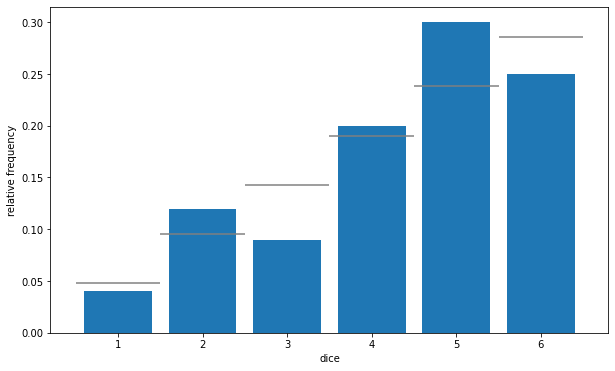

In [19]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프에 계급값인 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

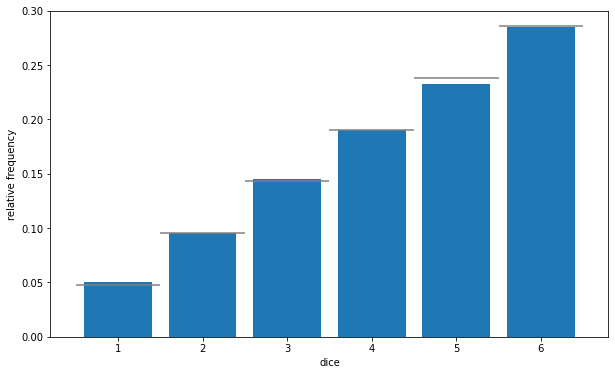

In [20]:
num_trial = 10000
sample = np.random.choice(dice, num_trial, p=prob)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프에 계급값인 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

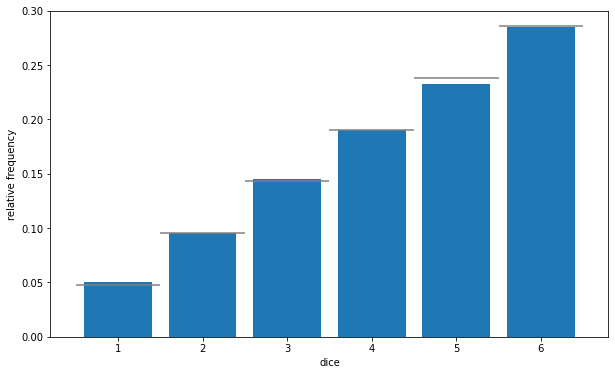

In [21]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=6, range=(1,7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1,7), np.arange(2,8), colors='gray')
# 막대그래프에 계급값인 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1,7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

## 추측 통계 
- 확률 변수 및 표본 평균의 분포

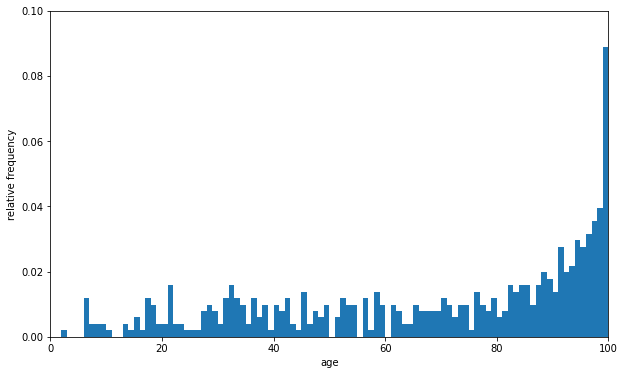

In [23]:
# 모집단의 전체 데이터
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(df['AGE'], bins=100, range=(0,100), density=True)
ax.set_xlim(0,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

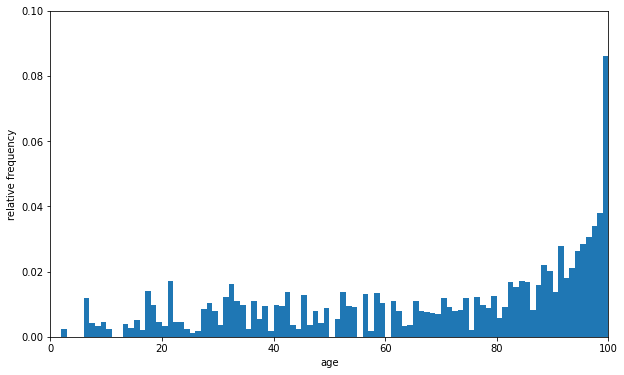

In [ ]:
# 10000번 복원 추출 후 확률분포
sample = np.random.choice(df['AGE'], 10000)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample, bins=100, range=(0,100), density=True)
ax.set_xlim(0,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

#### 표본평균의 분포
- 무작위 추출에 의한 표본평균으로 모평균을 추측할 수 있다.


In [27]:
# 모평균
df['AGE'].mean()

68.575

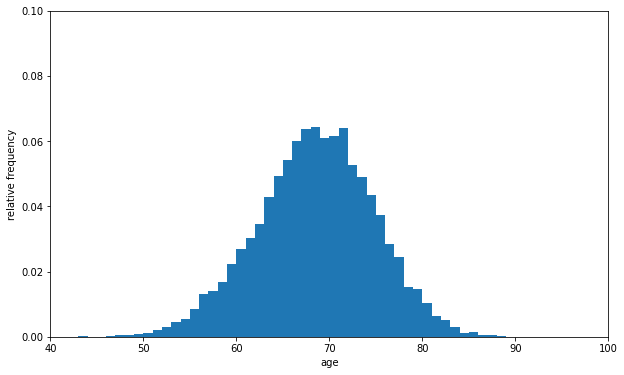

In [26]:
# 표본 평균의 분포(표본 20개씩 10,000번 추출 시행)
sample_means = [
    np.random.choice(df['AGE'], 20).mean()
    for _ in range(10000)
]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.hist(sample_means, bins=100, range=(0,100), density=True)
ax.set_xlim(40,100)
ax.set_ylim(0,0.1)
ax.set_xlabel('age')
ax.set_ylabel('relative frequency')

plt.show()

## 추정과 검정
- 추정 : 모수를 추측하는 것
    - 점추정 : 하나의 값으로 추정
    - 구간추정 : 구간으로 추정
- 검정 : 모집단의 통계적 성질에 대해 가설을 세우고 그 가설이 옳은지 여부 판단 ch 11에서 상세히 다룸